In [45]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from jupyterthemes import jtplot
jtplot.style(grid=False)

from wrangle_zillow import wrangle_zillow, scale_data, split_zillow

In [3]:
df = wrangle_zillow()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66858 entries, 0 to 77379
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parcelid                    66858 non-null  int64  
 1   logerror                    66858 non-null  float64
 2   transactiondate             66858 non-null  object 
 3   bathrooms                   66858 non-null  float64
 4   bedrooms                    66858 non-null  float64
 5   buildingqualitytypeid       66858 non-null  float64
 6   square_feet                 66858 non-null  float64
 7   fips                        66858 non-null  float64
 8   latitude                    66858 non-null  float64
 9   longitude                   66858 non-null  float64
 10  lotsizesquarefeet           66858 non-null  float64
 11  rawcensustractandblock      66858 non-null  float64
 12  regionidcity                66858 non-null  float64
 13  regionidcounty              668

## 1. What is the distribution of each variable?

array([[<AxesSubplot:title={'center':'parcelid'}>,
        <AxesSubplot:title={'center':'logerror'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'buildingqualitytypeid'}>],
       [<AxesSubplot:title={'center':'square_feet'}>,
        <AxesSubplot:title={'center':'fips'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'lotsizesquarefeet'}>],
       [<AxesSubplot:title={'center':'rawcensustractandblock'}>,
        <AxesSubplot:title={'center':'regionidcity'}>,
        <AxesSubplot:title={'center':'regionidcounty'}>,
        <AxesSubplot:title={'center':'regionidzip'}>,
        <AxesSubplot:title={'center':'roomcnt'}>],
       [<AxesSubplot:title={'center':'unitcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'structuretaxvaluedollarcnt'}>,
        <Axe

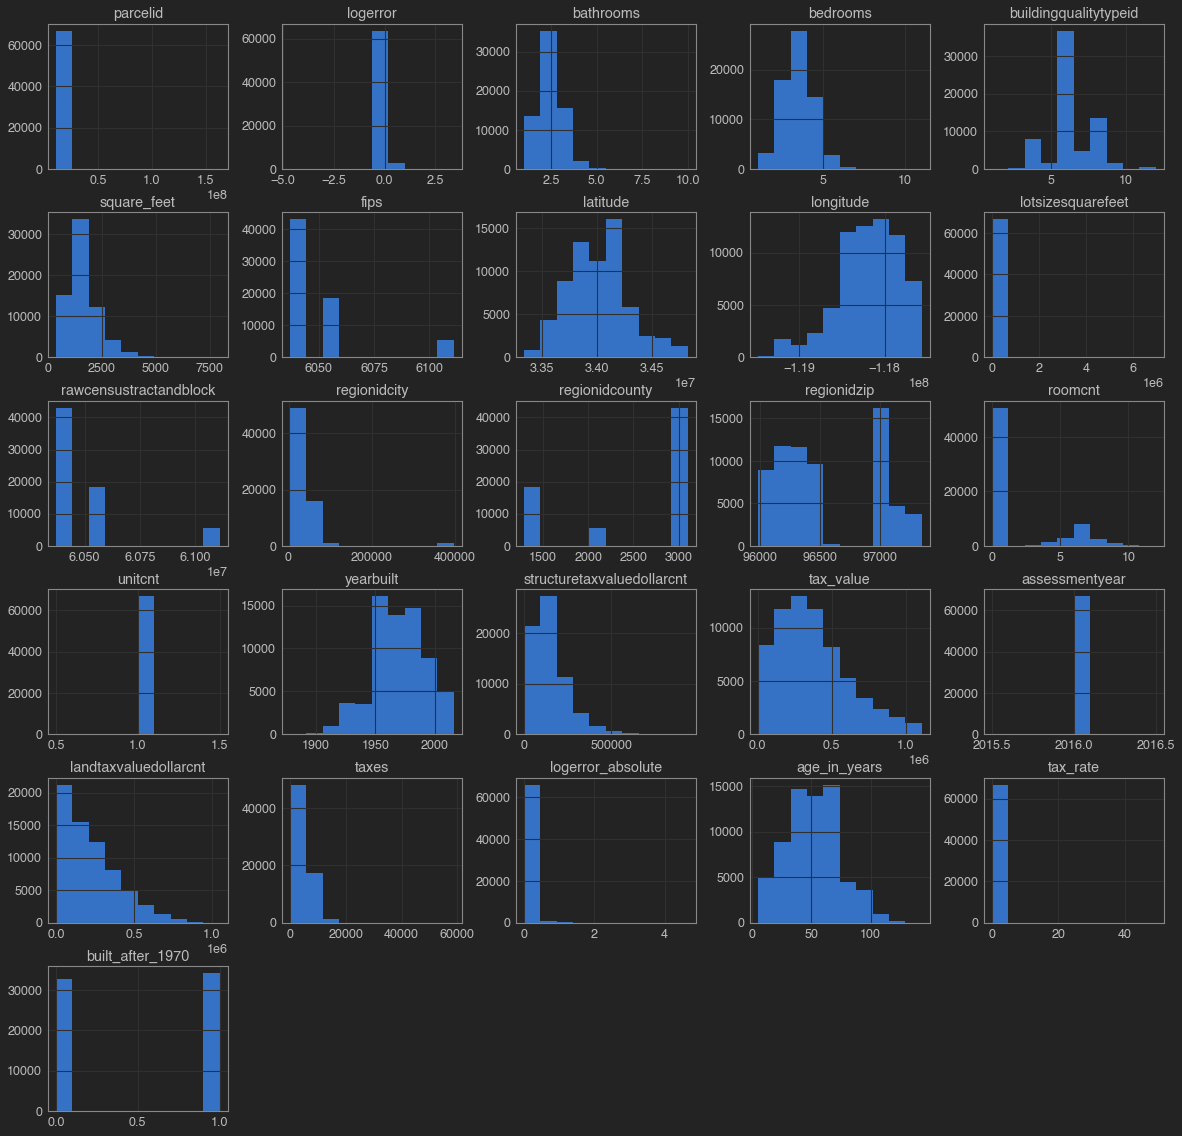

In [46]:
df.hist(figsize=[20,20])

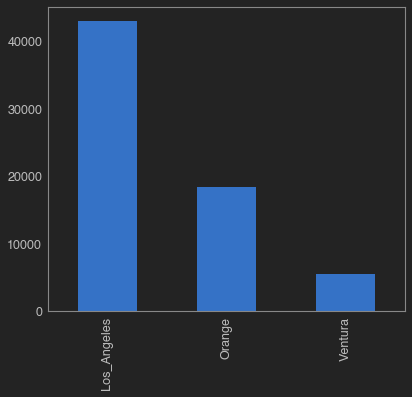

Los_Angeles    0.643124
Orange         0.274702
Ventura        0.082174
Name: county, dtype: float64

In [47]:
df.county.value_counts().plot.bar()
plt.show()
df.county.value_counts(normalize=True)

In [5]:
df.yearbuilt.describe()

count    66858.000000
mean      1969.113943
std         22.527280
min       1878.000000
25%       1954.000000
50%       1970.000000
75%       1986.000000
max       2016.000000
Name: yearbuilt, dtype: float64

In [40]:
df.age_in_years.describe()

count    66858.000000
mean        51.886057
std         22.527280
min          5.000000
25%         35.000000
50%         51.000000
75%         67.000000
max        143.000000
Name: age_in_years, dtype: float64

In [32]:
#new column for encoding houses built after 1970(median)
df['built_after_1970'] = df.yearbuilt.apply(lambda x: 1 if x >= 1970 else 0)

In [39]:
df.logerror_absolute.describe()

count    66858.000000
mean         0.064940
std          0.147503
min          0.000002
25%          0.013219
50%          0.030295
75%          0.063391
max          4.655420
Name: logerror_absolute, dtype: float64

In [88]:
#creating transaction month column
df['transactiondate'] = df.transactiondate.astype('str')
df['transaction_month'] = df.transactiondate.str.split('-',expand=True)[1]
df.transaction_month.value_counts()

06    9920
05    8968
08    8601
07    8207
03    8030
04    7511
01    6010
02    5483
09    4128
Name: transaction_month, dtype: int64

## Univariate takeaways:
- median yearbuilt is 1970 and median home age is 51
- median absolute log_error is 0.03, max is ~4.7
- 64% of properties are in LA county

In [89]:
#splitting data
train, validate, test = split_zillow(df, stratify_by='county')

In [90]:
train.shape, validate.shape, test.shape

((37440, 32), (16046, 32), (13372, 32))

## 2. How does each variable compare to absolute logerror?

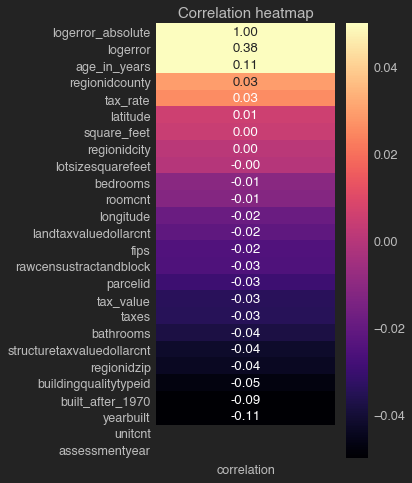

In [91]:
#correlation heatmap
corr = pd.DataFrame(train.corr()['logerror_absolute'].sort_values(ascending = False)).rename(columns = {'logerror_absolute':'correlation'})

plt.figure(figsize = (4,8))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -0.05, vmax = 0.05, cmap = 'magma')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

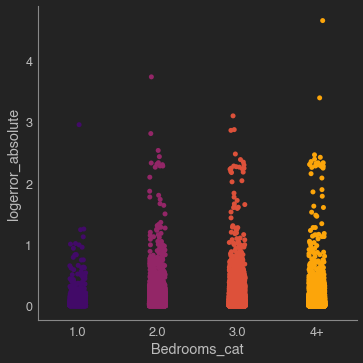

In [92]:
sns.catplot(data=train, x='Bedrooms_cat',y='logerror_absolute', palette='inferno',order=[1.0,2.0,3.0,'4+'])

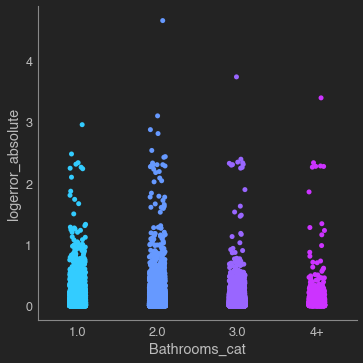

In [93]:
sns.catplot(data=train, x='Bathrooms_cat',y='logerror_absolute', palette='cool',order=[1.0,2.0,3.0,'4+'])

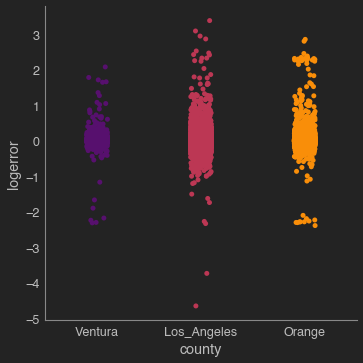

In [94]:
sns.catplot(data=train, x='county',y='logerror', hue='county', palette='inferno')

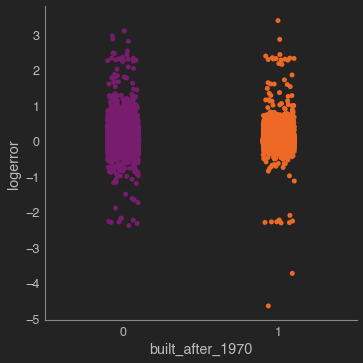

In [95]:
sns.catplot(data=train, x='built_after_1970',y='logerror', hue='built_after_1970', palette='inferno')

<AxesSubplot:xlabel='square_feet', ylabel='logerror'>

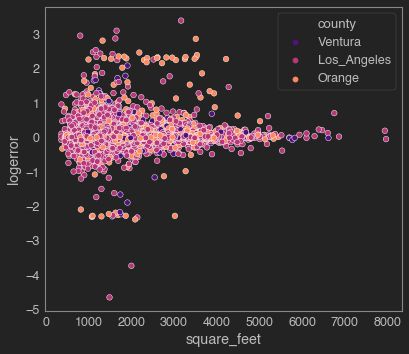

In [96]:
sns.scatterplot(data=train, x='square_feet',y='logerror', hue='county', palette='magma')

<AxesSubplot:xlabel='tax_value', ylabel='logerror'>

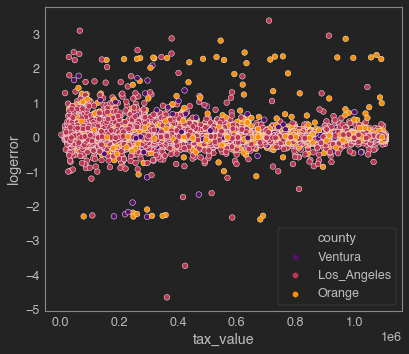

In [97]:
sns.scatterplot(data=train, x='tax_value',y='logerror', hue='county', palette='inferno')

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

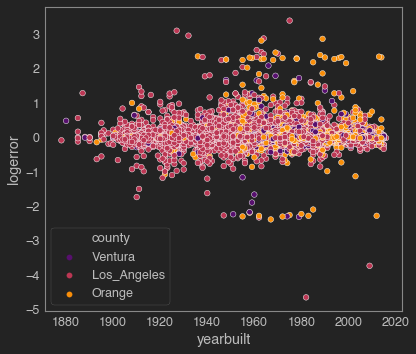

In [98]:
sns.scatterplot(data=train, x='yearbuilt',y='logerror', hue='county', palette='inferno')

<AxesSubplot:xlabel='transaction_month', ylabel='logerror_absolute'>

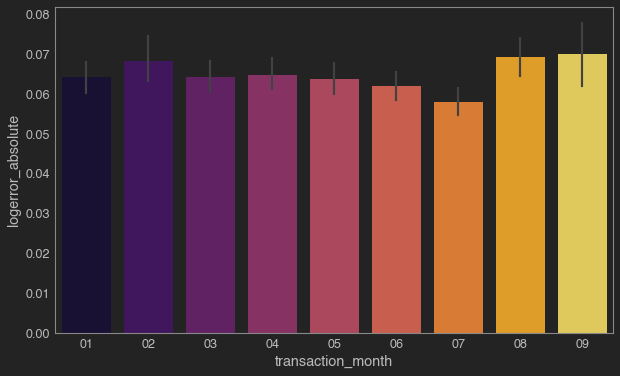

In [123]:
plt.figure(figsize=[10,6])
sns.barplot(data=train, x='transaction_month',y='logerror_absolute', palette='inferno',order=['01','02','03','04','05','06','07','08','09'])

## Bivariate/Multivariate takeaways
- Not much correlation to absolute logerror. Best was home age with 0.11 r value
- LA county has a wider range of logerror including a few outliers with less than -3
- Minus a few outliers, homes built after 1970 generally have logerrors with a tighter grouping to 0
- Mean absolute logerror tends to decrease from March to July, August and September transactions had the highest absolute logerrors

## 3. Is the mean absolute log error significantly different between LA and Orange+Ventura county?

<AxesSubplot:xlabel='logerror_absolute', ylabel='Density'>

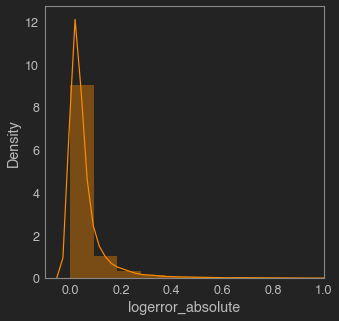

In [128]:
plt.figure(figsize=[5,5])
plt.xlim(-.1,1)
sns.distplot(train.logerror_absolute,color='darkorange')

In [129]:
LA_abslogerror = train[train.county == 'Los_Angeles'].logerror_absolute
Ventura_Orange_abslogerror = train[train.county != 'Los_Angeles'].logerror_absolute

In [130]:
null_hypothesis = "The mean absolute log errors are the same between LA and other counties"
alternative_hypothesis = "The mean absolute log errors are significantly different between LA and other counties"
confidence_level = .95
a = 1 - confidence_level

In [131]:
t, p = stats.ttest_ind(LA_abslogerror, Ventura_Orange_abslogerror)
t, p

(5.946857543085628, 2.7575872188153258e-09)

In [132]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In [133]:
print('The mean absolute log error for LA county is significantly different than Ventura + Orange counties')

The mean log error for LA county is significantly different than Ventura + Orange counties


In [134]:
LA_abslogerror.mean(), Ventura_Orange_abslogerror.mean()

(0.0678071566156529, 0.0585945006929287)

## 4. Is the mean absolute log error significantly different between homes built pre and post 1970?

<AxesSubplot:xlabel='logerror_absolute', ylabel='Density'>

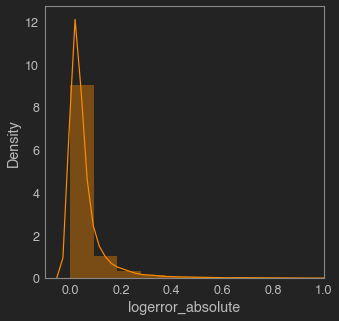

In [136]:
plt.figure(figsize=[5,5])
plt.xlim(-.1,1)
sns.distplot(train.logerror_absolute,color='darkorange')

<AxesSubplot:xlabel='yearbuilt', ylabel='Count'>

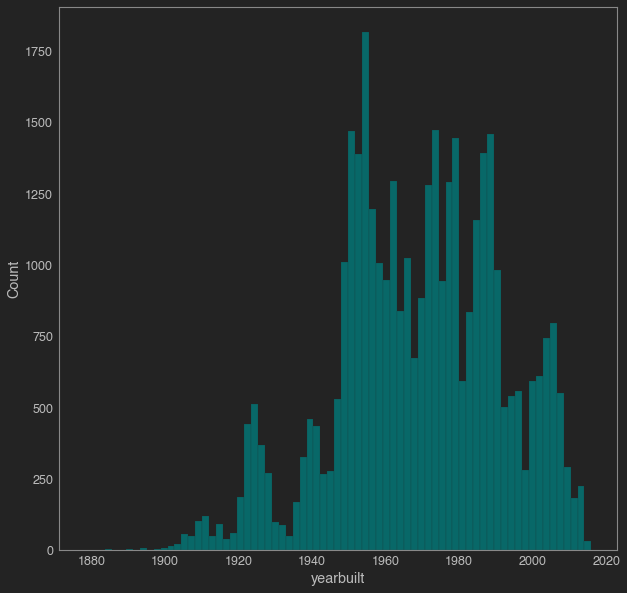

In [137]:
plt.figure(figsize=[10,10])
sns.histplot(train.yearbuilt,color='teal')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

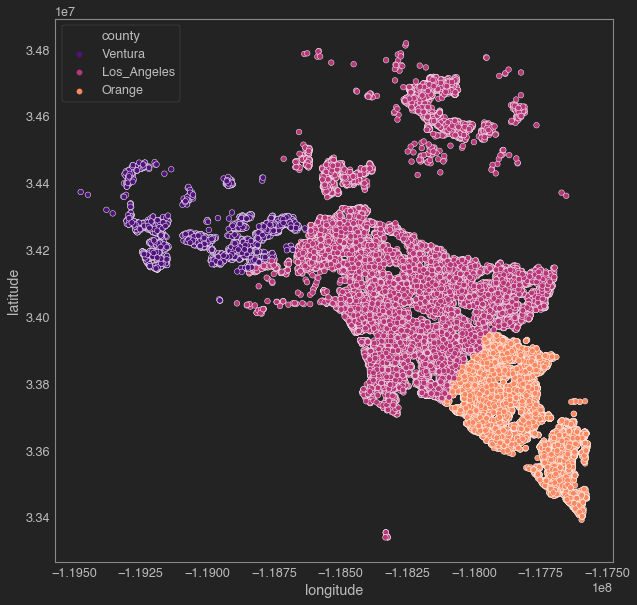

In [138]:
plt.figure(figsize=[10,10])
sns.scatterplot(y=train.latitude , x=train.longitude, hue=train.county, palette='magma')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

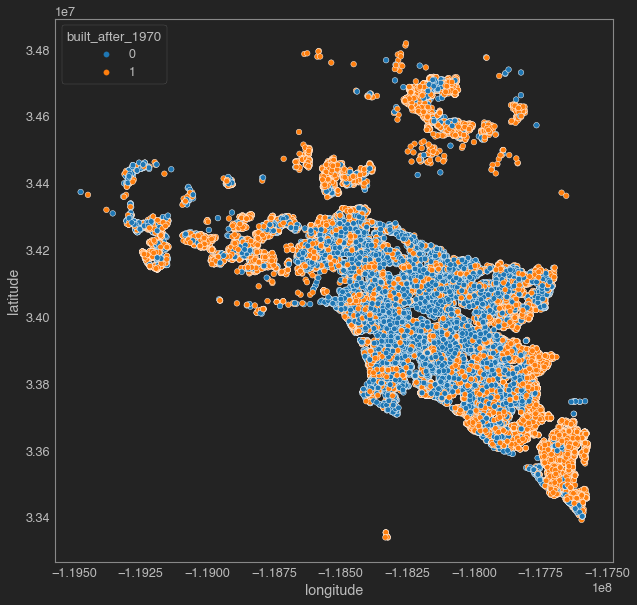

In [139]:
plt.figure(figsize=[10,10])
sns.scatterplot(y=train.latitude , x=train.longitude, hue=train.built_after_1970, palette='tab10')

<AxesSubplot:xlabel='square_feet', ylabel='logerror'>

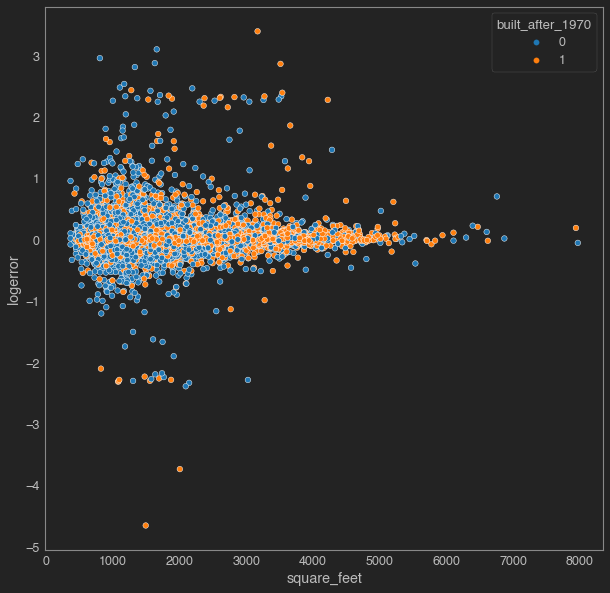

In [141]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=train, x='square_feet',y='logerror', hue='built_after_1970', palette='tab10')

In [142]:
post_1970_abslogerror = train[train.built_after_1970 == 1].logerror_absolute
pre_1970_abslogerror = train[train.built_after_1970 == 0].logerror_absolute

In [143]:
null_hypothesis = "The mean absolute log errors are the same between pre and post 1970"
alternative_hypothesis = "The mean absolute log errors are significantly different between pre and post 1970"
confidence_level = .95
a = 1 - confidence_level

In [144]:
t, p = stats.ttest_ind(pre_1970_abslogerror, post_1970_abslogerror)
t, p

(17.087207826707715, 3.2686417287011712e-65)

In [145]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In [146]:
print('We move forward with the alternative hypothesis acknowledging that the mean absolute log error is significantly different between homes built pre and post 1970')

We move forward with the alternative hypothesis acknowledging that the mean absolute log error is significantly different between homes built pre and post 1970


In [147]:
pre_1970_abslogerror.mean(), post_1970_abslogerror.mean()

(0.07745633355843484, 0.0521723802684004)

## is the mean absolute log error significantly different between homes sold March-July vs other months?

<AxesSubplot:xlabel='transaction_month', ylabel='logerror_absolute'>

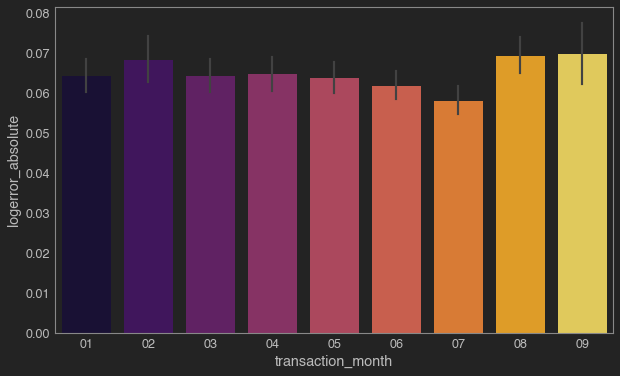

In [259]:
plt.figure(figsize=[10,6])
sns.barplot(data=train, x='transaction_month',y='logerror_absolute', palette='inferno',order=['01','02','03','04','05','06','07','08','09'])

In [158]:
#encoding 1 if county is LA
train['is_LA'] = train.county.apply(lambda x: 1 if x == 'Los_Angeles' else 0)
validate['is_LA'] = validate.county.apply(lambda x: 1 if x == 'Los_Angeles' else 0)
test['is_LA'] = test.county.apply(lambda x: 1 if x == 'Los_Angeles' else 0)

#encoding 1 if March through July
midmonths = ['03','04','05','06','07']
train['is_midmonths'] = train.transaction_month.apply(lambda x: 1 if x in midmonths else 0)
validate['is_midmonths'] = validate.transaction_month.apply(lambda x: 1 if x in midmonths else 0)
test['is_midmonths'] = test.transaction_month.apply(lambda x: 1 if x in midmonths else 0)

In [261]:
midmonth_abslogerror = train[train.is_midmonths == 1].logerror_absolute
othermonth_abslogerror = train[train.is_midmonths == 0].logerror_absolute

In [262]:
null_hypothesis = "The mean absolute log errors are the same between homes sold from March-July and other months"
alternative_hypothesis = "The mean absolute log errors are significantly different between homes sold from March-July and other months"
confidence_level = .95
a = 1 - confidence_level

In [263]:
t, p = stats.ttest_ind(midmonth_abslogerror, othermonth_abslogerror)
t, p

(-3.5232917351909747, 0.00042672967529639583)

In [264]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In [265]:
print('We move forward with the alternative hypothesis acknowledging that the mean absolute log error is significantly different between homes sold from March-July and other months')

We move forward with the alternative hypothesis acknowledging that the mean absolute log error is significantly different between homes sold from March-July and other months


In [266]:
midmonth_abslogerror.mean(), othermonth_abslogerror.mean()

(0.06254635020892475, 0.06798720785686675)

# Modeling and Evaluation
- Scale data
- Feature engineering
- Clustering
- Create regression models based on clusters

In [148]:
cat_vars = ['county',
            'Bedrooms_cat',
            'Bathrooms_cat',
            'buildingqualitytypeid',
            'transaction_month',
            'built_after_1970']

quant_vars = ['square_feet',
              'lotsizesquarefeet',
              'tax_value',
              'taxes',
              'age_in_years',
              'tax_rate',
              'bedrooms',
              'bathrooms',
              'logerror',
              'logerror_absolute'
              ]

In [177]:
features = ['bedrooms',
            'bathrooms',
            'square_feet',
            'lotsizesquarefeet',
            'tax_value',
            'tax_rate',
            'age_in_years',
            'built_after_1970',
            'is_LA',
            'is_midmonths',
            'latitude',
            'longitude'
           ]

X_train = train[features]
y_train = train.logerror

X_validate = validate[features]
y_validate = validate.logerror

X_test = test[features]
y_test = test.logerror

In [178]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train,X_validate,X_test)
X_train_scaled.head()

,bedrooms,bathrooms,square_feet,lotsizesquarefeet,tax_value,tax_rate,age_in_years,built_after_1970,is_LA,is_midmonths,latitude,longitude
0,0.045562,-0.852878,-0.890545,-0.156188,0.489345,-0.473265,0.318762,-1.023623,-1.342377,0.754248,0.677789,-1.850657
1,1.086346,-0.219399,1.221363,-0.151314,-1.071105,0.381005,0.274273,-1.023623,0.744947,0.754248,0.430286,0.490343
2,1.086346,-0.219399,0.134823,-0.113206,-0.457315,-0.112573,0.452227,-1.023623,0.744947,-1.325823,0.902277,-0.889295
3,-0.995222,-0.219399,-0.453599,-0.178027,0.212718,-0.397330,-0.748966,0.976922,-1.342377,-1.325823,-0.819241,1.112484
4,0.045562,-1.486356,-1.231363,-0.191009,-1.464468,1.349178,1.386489,-1.023623,0.744947,0.754248,-0.214087,-0.180301


In [183]:
import FE_cluster
FE_cluster.select_kbest(X_train_scaled,y_train, 8)

['bathrooms',
 'tax_value',
 'tax_rate',
 'age_in_years',
 'built_after_1970',
 'is_LA',
 'is_midmonths',
 'longitude']

In [184]:
FE_cluster.rfe(X_train_scaled, y_train, 8)

['bedrooms',
 'square_feet',
 'tax_value',
 'tax_rate',
 'age_in_years',
 'is_midmonths',
 'latitude',
 'longitude']

## square_feet, tax_value cluster
age, tax value
is_LA, tax_value

In [187]:
from sklearn.cluster import KMeans

In [229]:
X = X_train_scaled[['square_feet','tax_value']]

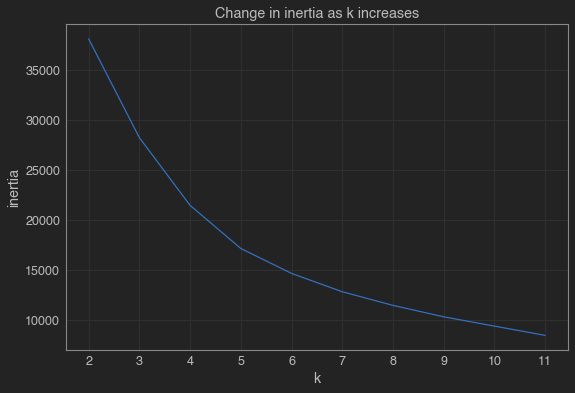

In [221]:
with plt.style.context('seaborn-whitegrid'):
    jtplot.style()
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [230]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)

array([1, 4, 4, ..., 2, 3, 1], dtype=int32)

In [231]:
X_train_scaled['cluster'] = kmeans.predict(X)
X['cluster'] = kmeans.predict(X)
X.head()

,square_feet,tax_value,cluster
0,-0.890545,0.489345,1
1,1.221363,-1.071105,4
2,0.134823,-0.457315,4
3,-0.453599,0.212718,1
4,-1.231363,-1.464468,2


In [232]:
kmeans.cluster_centers_

array([[ 2.38061138,  1.70389684],
       [-0.43259377,  0.15610355],
       [-0.67900897, -0.90516742],
       [ 0.39111605,  1.40346369],
       [ 0.89257699, -0.38147395]])

In [233]:
X.iloc[:,0:3]

,square_feet,tax_value,cluster
0,-0.890545,0.489345,1
1,1.221363,-1.071105,4
2,0.134823,-0.457315,4
3,-0.453599,0.212718,1
4,-1.231363,-1.464468,2
...,...,...,...
37435,-0.476902,-1.137875,2
37436,-0.641486,0.815896,1
37437,-0.061803,-0.993605,2
37438,0.161039,1.803091,3


In [234]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.iloc[:,0:2].columns)
centroids_scaled

,square_feet,tax_value
0,2.380611,1.703897
1,-0.432594,0.156104
2,-0.679009,-0.905167
3,0.391116,1.403464
4,0.892577,-0.381474


In [235]:
centroids = X_train_scaled.groupby('cluster')['square_feet', 'tax_value'].mean()
centroids

,square_feet,tax_value
cluster,,
0,2.384342,1.700602
1,-0.431898,0.158427
2,-0.679375,-0.903962
3,0.394202,1.405468
4,0.890105,-0.383324


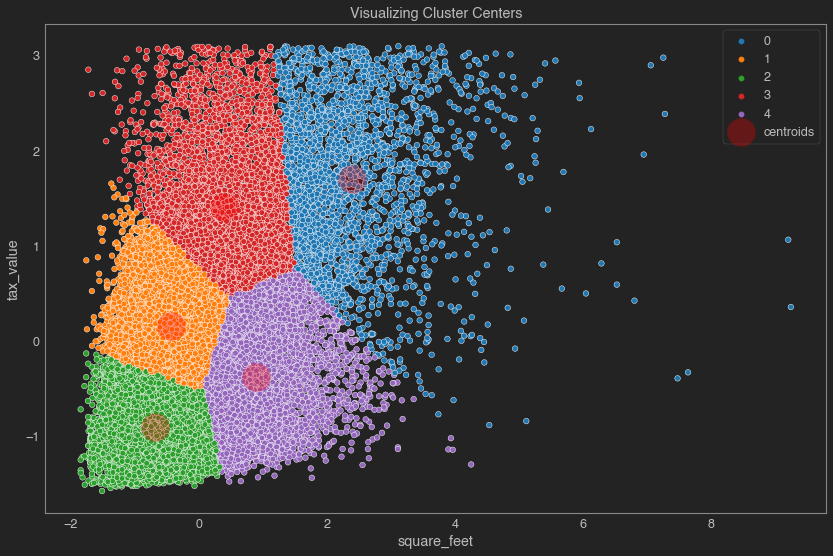

In [236]:
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'square_feet', y = 'tax_value', data = X, hue = 'cluster', palette='tab10')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'square_feet', y = 'tax_value', ax = plt.gca(), color ='red', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

No handles with labels found to put in legend.


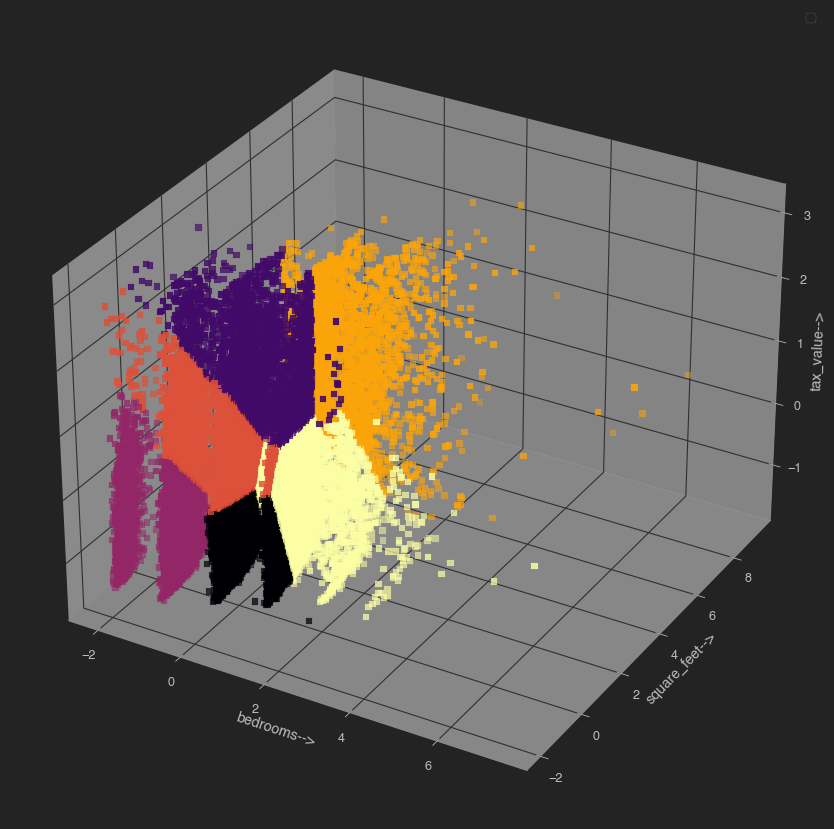

In [219]:
from mpl_toolkits.mplot3d import Axes3D


#df = pd.DataFrame(v, columns=['Feature1', 'Feature2','Feature3',"Cluster"])

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
x = np.array(X['bedrooms'])
y = np.array(X['square_feet'])
z = np.array(X['tax_value'])

ax.scatter(x,y,z, marker="s", c=X["cluster"], s=40, cmap="inferno")
ax.set_xlabel('bedrooms-->')
ax.set_ylabel('square_feet-->')
ax.set_zlabel('tax_value-->')
ax.legend()

plt.show()

# age, tax_value

In [237]:
X = X_train_scaled[['age_in_years','tax_value']]

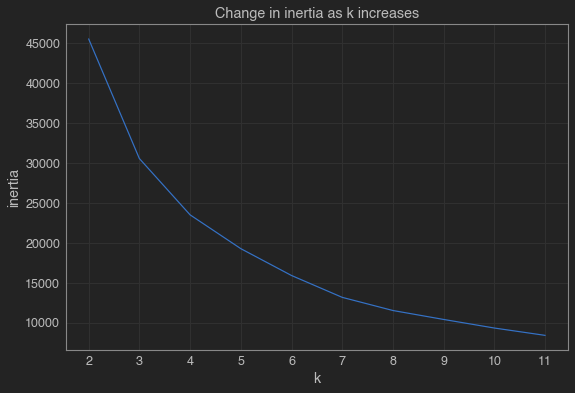

In [238]:
with plt.style.context('seaborn-whitegrid'):
    jtplot.style()
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [239]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
kmeans.predict(X)

array([0, 1, 1, ..., 2, 4, 2], dtype=int32)

In [240]:
X_train_scaled['cluster'] = kmeans.predict(X)
X['cluster'] = kmeans.predict(X)
X.head()

,age_in_years,tax_value,cluster
0,0.318762,0.489345,0
1,0.274273,-1.071105,1
2,0.452227,-0.457315,1
3,-0.748966,0.212718,2
4,1.386489,-1.464468,1


In [241]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.iloc[:,0:2].columns)
centroids_scaled

,age_in_years,tax_value
0,0.386385,0.267046
1,0.453112,-0.979878
2,-0.838140,-0.331531
3,0.780628,1.785571
4,-1.126144,1.405815
5,1.932919,-0.544615


In [242]:
centroids = X_train_scaled.groupby('cluster')['age_in_years', 'tax_value'].mean()
centroids

,age_in_years,tax_value
cluster,,
0,0.387115,0.265754
1,0.454608,-0.980784
2,-0.837275,-0.332809
3,0.777028,1.786255
4,-1.126868,1.402978
5,1.935462,-0.541831


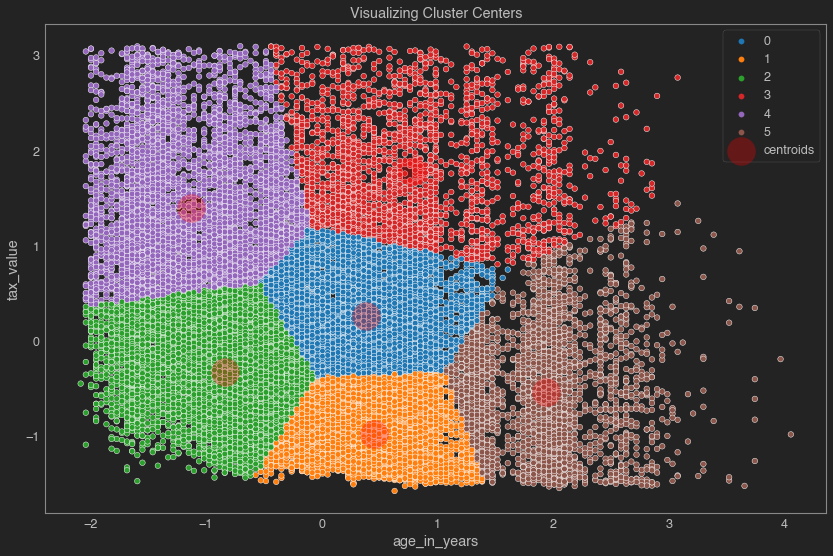

In [244]:
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age_in_years', y = 'tax_value', data = X, hue = 'cluster', palette='tab10')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'age_in_years', y = 'tax_value', ax = plt.gca(), color ='red', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

# longitude, latitude

In [268]:
X = X_train_scaled[['longitude','latitude']]

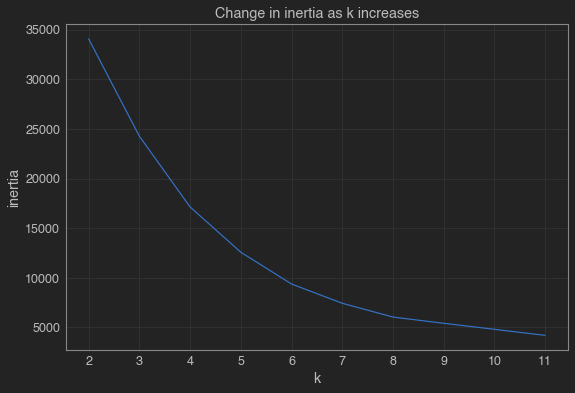

In [269]:
with plt.style.context('seaborn-whitegrid'):
    jtplot.style()
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [270]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
kmeans.predict(X)

array([4, 0, 1, ..., 1, 3, 3], dtype=int32)

In [271]:
X_train_scaled['cluster'] = kmeans.predict(X)
X['cluster'] = kmeans.predict(X)
X.head()

,longitude,latitude,cluster
0,-1.850657,0.677789,4
1,0.490343,0.430286,0
2,-0.889295,0.902277,1
3,1.112484,-0.819241,3
4,-0.180301,-0.214087,2


In [272]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.iloc[:,0:2].columns)
centroids_scaled

,longitude,latitude
0,0.636620,0.063675
1,-0.704718,0.726776
2,-0.113032,-0.501192
3,1.121700,-1.274933
4,-2.220056,0.828145
5,0.191713,2.299011


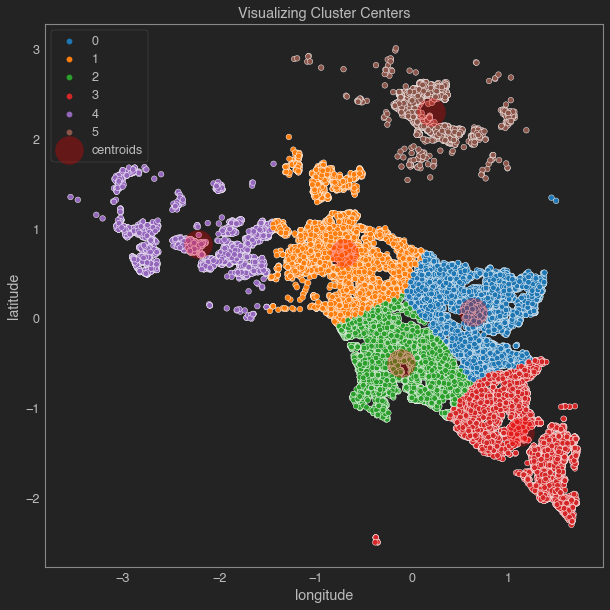

In [278]:
plt.figure(figsize=(10, 10))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y = 'latitude', data = X_train_scaled, hue = 'cluster', palette='tab10')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'longitude', y = 'latitude', ax = plt.gca(), color ='red', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

Cluster_0 = East LA
Cluster_1 = west LA
Cluster_2 = southwest LA
Cluster_3 = Orange
Cluster_4 = Ventura
Cluster_5 = North_LA